# Telco Customer Churn Prediction

## 1. About Dataset

Refer dataset

## 2. Import Libraries

In [1]:
#Import libraries for data processing and data visualization 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

#Import libraries for machine learning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

from sklearn import metrics

#ignore warning
import warnings
warnings.filterwarnings("ignore")

#full display columns and rows 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width',1000)


## 3.Download Dataset

In [2]:
df = pd.read_csv('telco_customer_churn.csv')
df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 4.Inspecting and Cleaning Dataset

Comment: This dataset includes 21 columns and 7043 rows. There is no missing and duplicated values 


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe(include='all')

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
df.isnull().sum()

CustomerID          0
Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

## 5.EDA

### 5.1. Define numerical and categorical variables 

First, I will define the numerical variables using the select_dtypes function. Then, I will examine the unique values of each variable to determine whether they are truly numerical or categorical

In [8]:
#check numerical variables 
num_cols = df.select_dtypes('number').columns
num_cols

Index(['SeniorCitizen', 'Tenure', 'MonthlyCharges'], dtype='object')

In [9]:
#check unique values of each variables
for col in num_cols:
    if df[col].nunique() < 10:
        print(f'Column name: {col} \nUnique values: {df[col].nunique()} {df[col].unique()}\n')
    else:
        print(f"column name: {col} \nUnique values: {df[col].nunique()}\n")

Column name: SeniorCitizen 
Unique values: 2 [0 1]

column name: Tenure 
Unique values: 73

column name: MonthlyCharges 
Unique values: 1585



We observe that "Seniorcitizen" is a categorical variable, so we will include it in the categorical group

In [10]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

Now, I will define the categorical variables using the select_dtypes function again. After that, I will check the unique values of ech variable to assess whether they are genuinely categorical numerical, or if any variables need to be removed

In [11]:
#define category clumns
cat_cols = df.select_dtypes('object').columns.to_list()
cat_cols.append('SeniorCitizen')

print(f'Total: {len(cat_cols)}')
print(cat_cols)

Total: 20
['CustomerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn', 'SeniorCitizen']


In [12]:
col_names = []
unique_values = []
values = []
list_col = ['OnlineBackup', 'StreamingMovies', 'StreamingTV','TechSupport', 'DeviceProtection', 'OnlineSecurity', 'MultipleLines']

#cleaning up values
for col in list_col:
    df[col] = np.where((df[col] == 'No phone service') | (df[col] == 'No internet service'), 'No', 'Yes')

#check categorical variables
for col in cat_cols:
    if df[col].nunique() < 10:
        col_names.append(col)
        unique_values.append(df[col].nunique())
        values.append(df[col].unique())
    else:
        col_names.append(col)
        unique_values.append(df[col].nunique())
        values.append('')

cat_table = pd.DataFrame({'col name' : col_names,
                          'unique values': unique_values,
                          'values': values})

cat_table.sort_values(by='unique values', ascending=False)

,col name,unique values,values
0,CustomerID,7043,
17,TotalCharges,6531,
16,PaymentMethod,4,"[Electronic check, Mailed check, Bank transfer..."
14,Contract,3,"[Month-to-month, One year, Two year]"
7,InternetService,3,"[DSL, Fiber optic, No]"
11,TechSupport,2,"[Yes, No]"
18,Churn,2,"[No, Yes]"
15,PaperlessBilling,2,"[Yes, No]"
13,StreamingMovies,2,"[Yes, No]"
12,StreamingTV,2,"[Yes, No]"


Dropping the "CustomerID" columns as it holds no analystical significance

In [13]:
df.drop(columns=['CustomerID'], inplace = True)

In [14]:
df.duplicated().sum()

np.int64(23)

After dropping the "customerID" column, we identified duplicated values in the dataset. Therefore, Im going to remove them

In [15]:
#Drop customerid because there is no meaning in analytics
df.drop_duplicates(inplace=True)

Convert TotalCharge to number datatypes

In [16]:
#convert totalcharge to number datatype
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype('float')

Finalize variable types

Comment: After reviewing the dataset, we have defined the 3 numerical and 17 categorical columns as below

In [17]:
print(f'Numerical variables: {len(df.select_dtypes('number').columns.to_list())}, {df.select_dtypes('number').columns}')
print(f'Categorical variables: {len(df.select_dtypes('object').columns.to_list())}, {df.select_dtypes('object').columns}')

Numerical variables: 3, Index(['Tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')
Categorical variables: 17, Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'], dtype='object')


### 5.2. Analyze 1 variable

#### 5.2.1 Analyze numerical variables

Comment: We have 03 numerical variables, and overall, there are no outliers, nor do these variables follow a normal distribution. It is observed that the 'TotalCharges' variable is right-skewed and has a high variance. Therefore, I may consider applying log normalization or using a standard scaler for these variables.

== Column name: Tenure
 Median: 29.0 
Mean:32.47393162393163


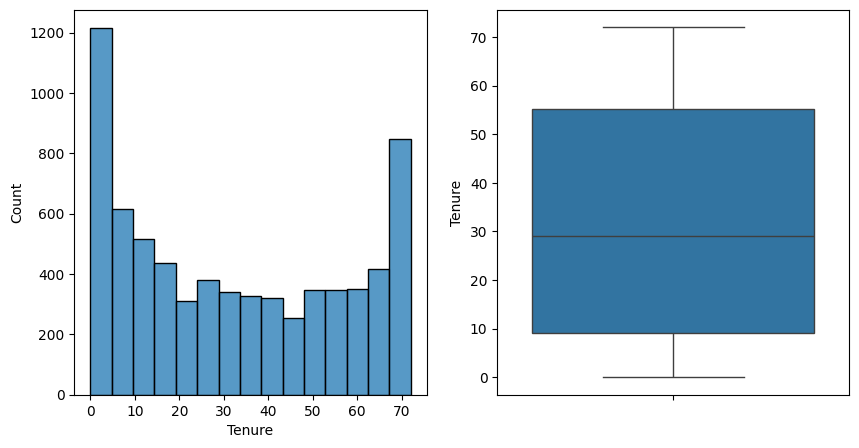

== Column name: MonthlyCharges
 Median: 70.4 
Mean:64.85403846153847


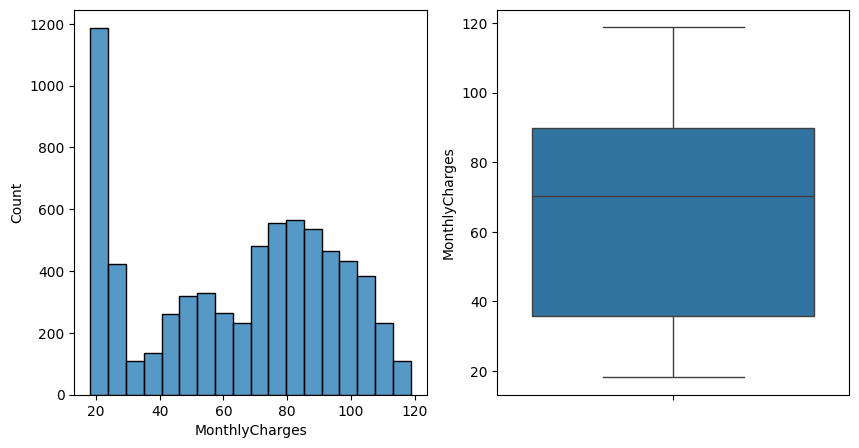

== Column name: TotalCharges
 Median: 1404.65 
Mean:2290.673056070766


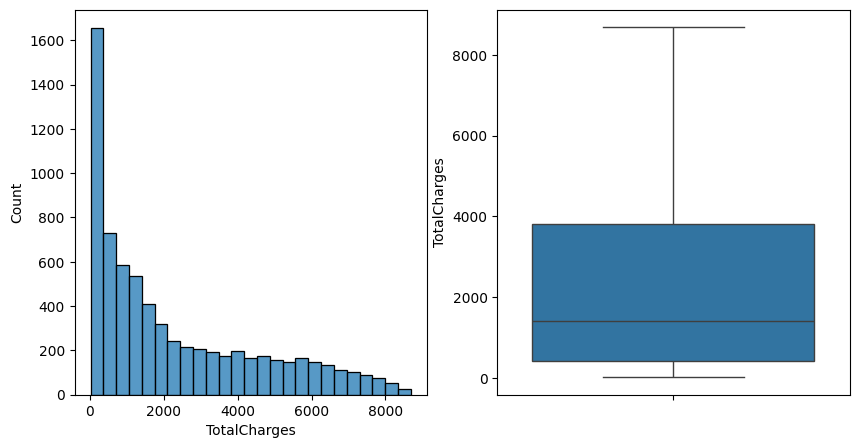

In [18]:
num_cols = df.select_dtypes('number').columns.to_list()
for col in num_cols:
    print(f'== Column name: {col}\n Median: {df[col].median()} \nMean:{df[col].mean()}')
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(df, x= col)

    plt.subplot(1,2,2)
    sns.boxplot(data=df, y=col)
    plt.show()

<Axes: >

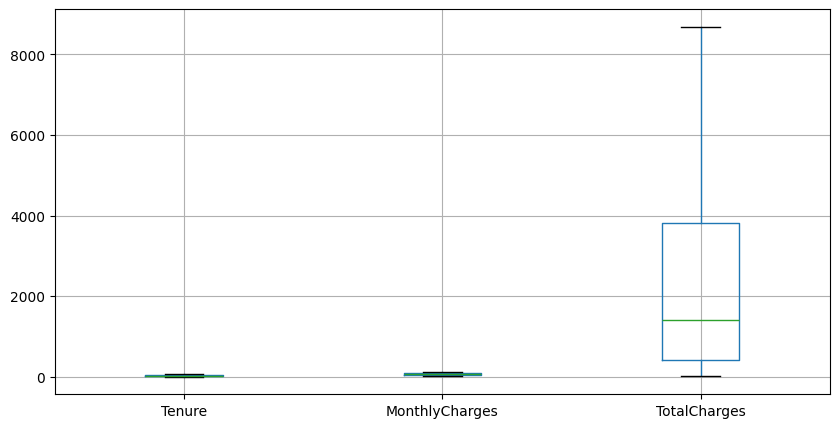

In [19]:
plt.figure(figsize=(10,5))
df[num_cols].boxplot()

#### 5.2.2 Analyze categorical variables

Comment: We see that this dataset is imbalanced. I'm going to use "Oversampling" method to balance dataset later

== Column name: Gender
 Unique values: ['Female' 'Male'] \Mode:Male

Gender
Male      3540
Female    3480
Name: count, dtype: int64


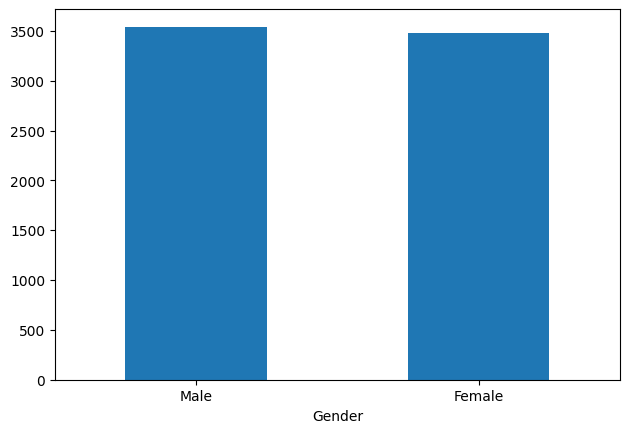

----------------------------------------

== Column name: SeniorCitizen
 Unique values: [0 1] \Mode:0

SeniorCitizen
0    5879
1    1141
Name: count, dtype: int64


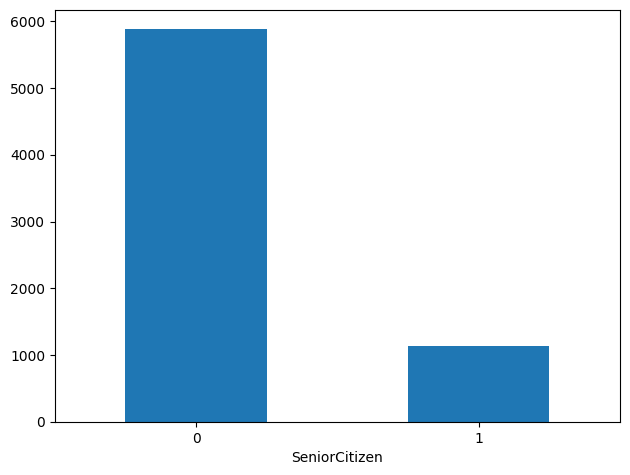

----------------------------------------

== Column name: Partner
 Unique values: ['Yes' 'No'] \Mode:No

Partner
No     3618
Yes    3402
Name: count, dtype: int64


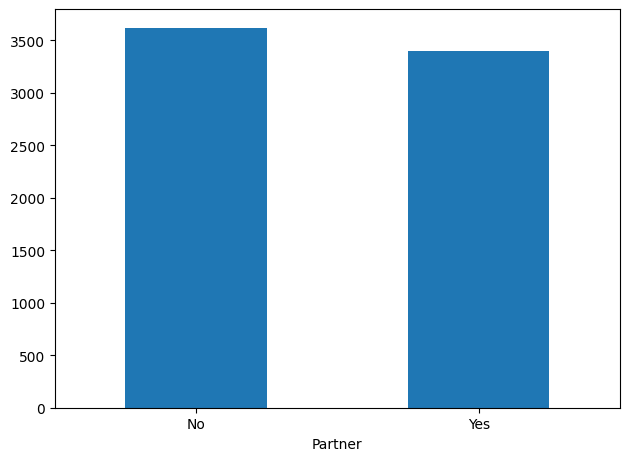

----------------------------------------

== Column name: Dependents
 Unique values: ['No' 'Yes'] \Mode:No

Dependents
No     4910
Yes    2110
Name: count, dtype: int64


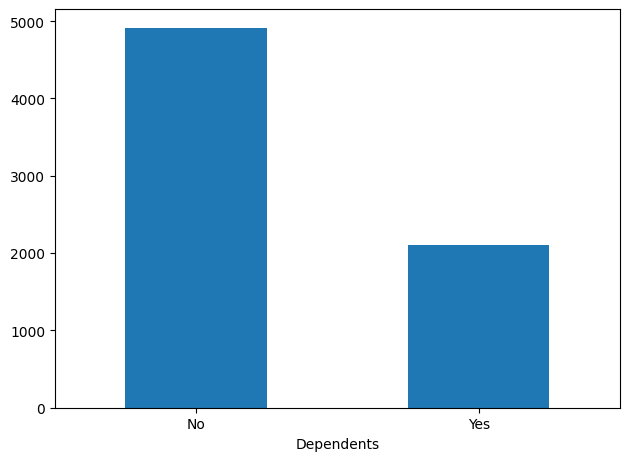

----------------------------------------

== Column name: PhoneService
 Unique values: ['No' 'Yes'] \Mode:Yes

PhoneService
Yes    6338
No      682
Name: count, dtype: int64


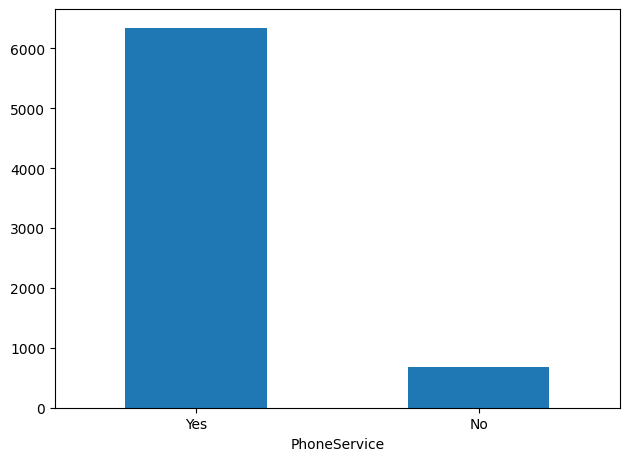

----------------------------------------

== Column name: MultipleLines
 Unique values: ['No' 'Yes'] \Mode:Yes

MultipleLines
Yes    6338
No      682
Name: count, dtype: int64


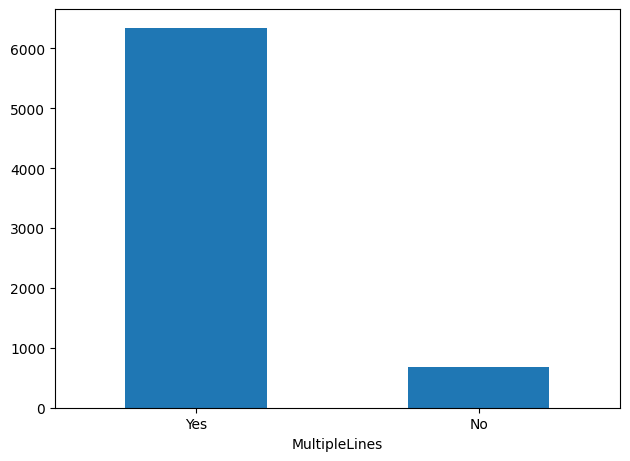

----------------------------------------

== Column name: InternetService
 Unique values: ['DSL' 'Fiber optic' 'No'] \Mode:Fiber optic

InternetService
Fiber optic    3090
DSL            2418
No             1512
Name: count, dtype: int64


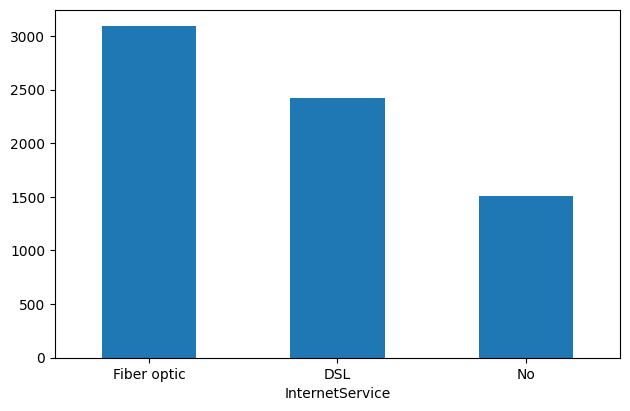

----------------------------------------

== Column name: OnlineSecurity
 Unique values: ['Yes' 'No'] \Mode:Yes

OnlineSecurity
Yes    5508
No     1512
Name: count, dtype: int64


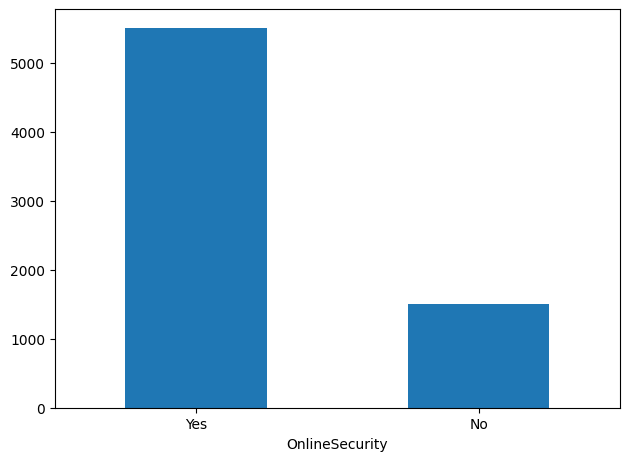

----------------------------------------

== Column name: OnlineBackup
 Unique values: ['Yes' 'No'] \Mode:Yes

OnlineBackup
Yes    5508
No     1512
Name: count, dtype: int64


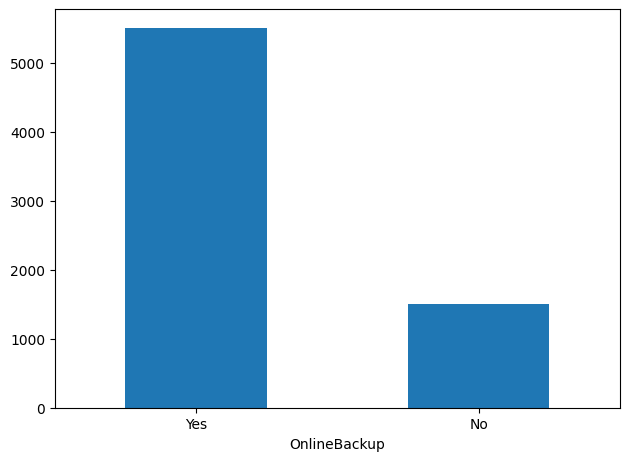

----------------------------------------

== Column name: DeviceProtection
 Unique values: ['Yes' 'No'] \Mode:Yes

DeviceProtection
Yes    5508
No     1512
Name: count, dtype: int64


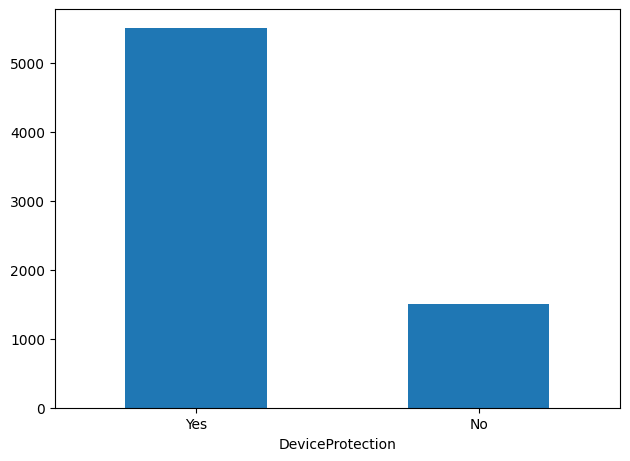

----------------------------------------

== Column name: TechSupport
 Unique values: ['Yes' 'No'] \Mode:Yes

TechSupport
Yes    5508
No     1512
Name: count, dtype: int64


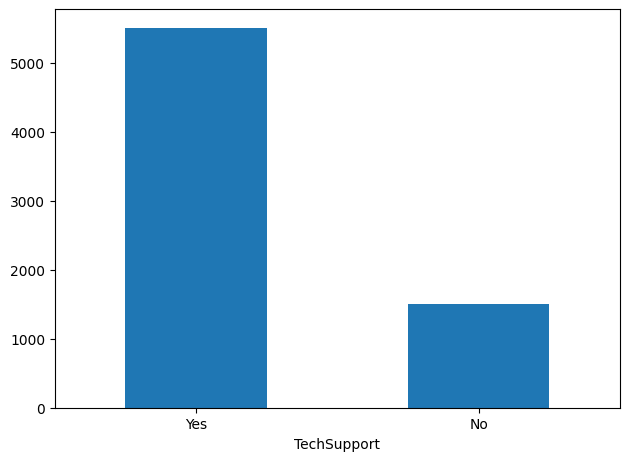

----------------------------------------

== Column name: StreamingTV
 Unique values: ['Yes' 'No'] \Mode:Yes

StreamingTV
Yes    5508
No     1512
Name: count, dtype: int64


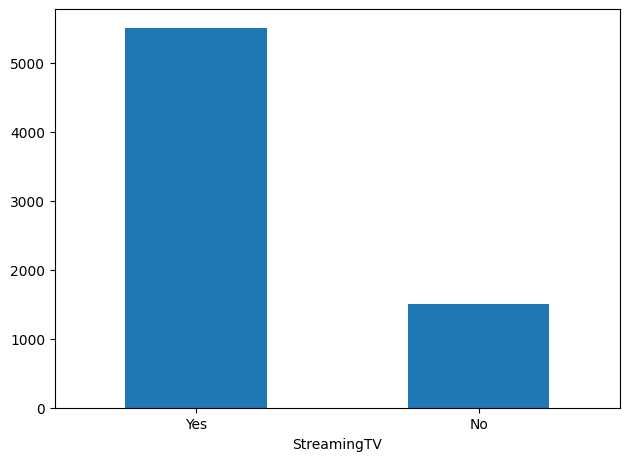

----------------------------------------

== Column name: StreamingMovies
 Unique values: ['Yes' 'No'] \Mode:Yes

StreamingMovies
Yes    5508
No     1512
Name: count, dtype: int64


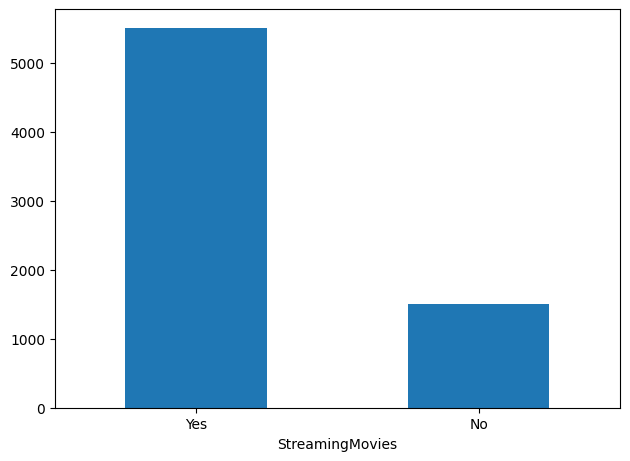

----------------------------------------

== Column name: Contract
 Unique values: ['Month-to-month' 'One year' 'Two year'] \Mode:Month-to-month

Contract
Month-to-month    3852
Two year          1695
One year          1473
Name: count, dtype: int64


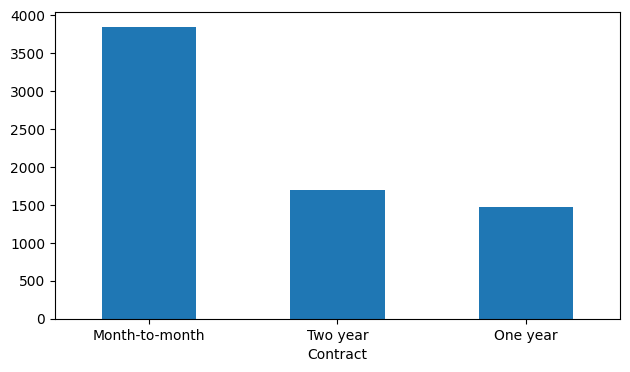

----------------------------------------

== Column name: PaperlessBilling
 Unique values: ['Yes' 'No'] \Mode:Yes

PaperlessBilling
Yes    4160
No     2860
Name: count, dtype: int64


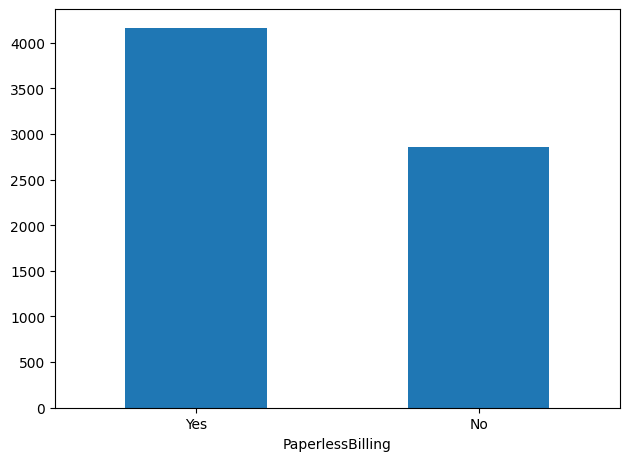

----------------------------------------

== Column name: PaymentMethod
 Unique values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)'] \Mode:Electronic check

PaymentMethod
Electronic check             2359
Mailed check                 1596
Bank transfer (automatic)    1544
Credit card (automatic)      1521
Name: count, dtype: int64


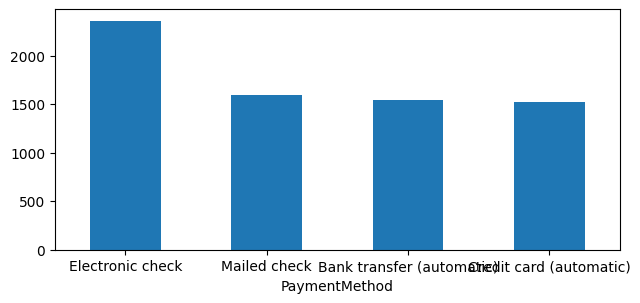

----------------------------------------

== Column name: Churn
 Unique values: ['No' 'Yes'] \Mode:No

Churn
No     5163
Yes    1857
Name: count, dtype: int64


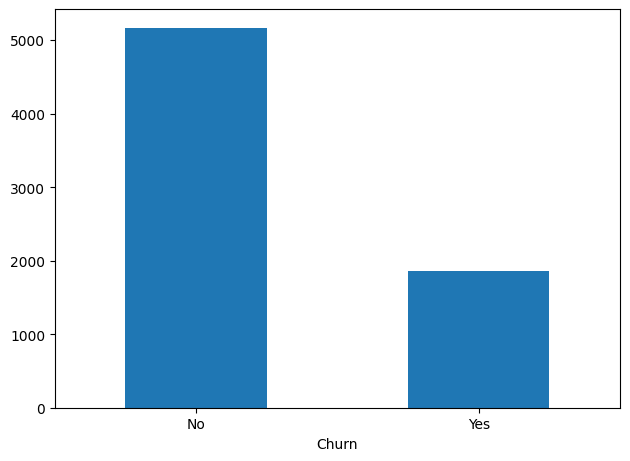

----------------------------------------



In [20]:
cat_cols = df.select_dtypes('object').columns.to_list()
for col in cat_cols:
    print(f'== Column name: {col}\n Unique values: {df[col].unique()} \Mode:{df[col].mode()[0]}\n')
    print(df[col].value_counts())

    df[col].value_counts().plot.bar()
    plt.tight_layout()
    plt.xticks(rotation = 0)
    plt.show()

    print('--' * 20)
    print('')

### 5.3 Analyze 2 variables

#### 5.3.1 Numerical x numerical

First, I will begin by analyzing the correlation between the numerical variables. This will help us understand the relationships between them and identify any potential multicollinearity issues

In [21]:
numm_corr = df[num_cols].corr()
numm_corr

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.245193,0.825267
MonthlyCharges,0.245193,1.000000,0.650526
TotalCharges,0.825267,0.650526,1.000000


<Axes: >

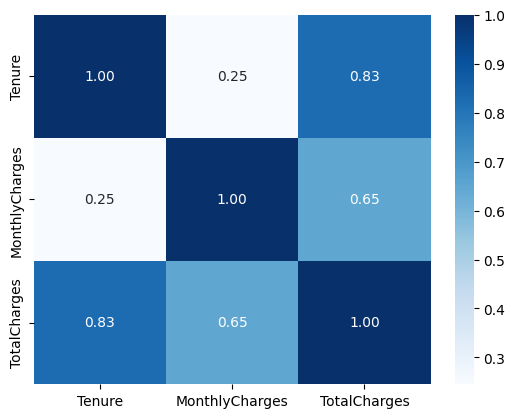

In [22]:
sns.heatmap(numm_corr, annot = True, fmt = '.2f', cmap = 'Blues', cbar = True)

Comment: Based on the results, it is evident that 'TotalCharges' is highly correlated with both 'Tenure' (83%) and 'MonthlyCharges' (65%), which contributes to multicollinearity. To address this issue, I decided to eliminate 'Tenure' and 'MonthlyCharges' and only use 'TotalCharges' in my model

In [23]:
df.groupby('Churn')['TotalCharges'].count()

Churn
No     5152
Yes    1857
Name: TotalCharges, dtype: int64

In [24]:
df.dropna(inplace=True)

#### 5.3.2 Numerical x Categorical

Next, I will examine the relationship between the 'TotalCharges' and 'Churn' variables to determine whether this numerical variable has an impact on the 'Churn' outcome, I plan to conduct an ANOVA hypothesis test for this assessment<br>

If the future influences on the target, I will include it in the 'dependent' varible

In [25]:
#need to search
from scipy.stats import f_oneway

dependent = []
for col in ['TotalCharges']:
    lst = []
    print(f'{col} \nHypothesis:\n H0:{col} and Churn are independent \n H1: {col} and Churn are dependent\n')

    for name,g in df.groupby('Churn'):
        lst.append(g[col])
    f_statistic, p_value = f_oneway(*lst)
    print('p-value:', p_value)

    if p_value < 0.05:
        dependent.append(col)
        print(f'== RESULT: reject H0: {col} and Churn are dependent')
    else:
        print(f'== RESULT: accept H0: {col} and Churn are dependent')
    print('----')

TotalCharges 
Hypothesis:
 H0:TotalCharges and Churn are independent 
 H1: TotalCharges and Churn are dependent

p-value: 3.436385600348015e-63
== RESULT: reject H0: TotalCharges and Churn are dependent
----


RESULT: reject H0: TotalCharges and Churn are dependent

<Axes: xlabel='TotalCharges'>

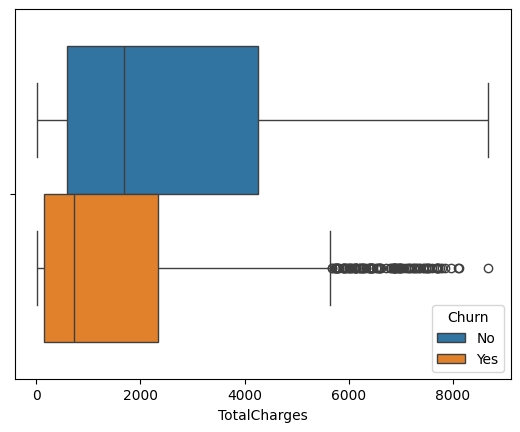

In [26]:
sns.boxplot(df, x = 'TotalCharges', hue='Churn')

Median lines are not in the same line -> TotalCharges and Chgurn are dependent

#### 5.3.3 Categorical x Categorical

Next, I will analyze the relationship between categorical variables and the target ("churn) to assess whether each categorical variable influences the 'Churn' outcome. I plan to conduct an Chi-squared hypothesis test for this assessment

In [27]:
cat_cols.remove('Churn')

If the feature is appropriate, I will include it in the 'dependent' variable created above

In [28]:
cat_cols

['Gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [29]:
from scipy.stats import chi2_contingency

i = 0
for col in cat_cols:
    i = i+1
    print(f'{i}, {col}\n Hypothesis: \n h0: {col} and Churn are independent \n H1: {col} and Churn are dependent \n')
    cross_tab = pd.crosstab(df[col], df['Churn'])
    print(cross_tab)

    chi2,p,dof,expected = chi2_contingency(cross_tab)
    print(f'p-value = {p}')

    if p < 0.05:
        dependent.append(col)
        print(f'== RESULT: reject H0: {col} and Churn are independent')
    else:
        print(f'== RESULT: accept H0: {col} and Churn are independent')
    print("-" * 20)

1, Gender
 Hypothesis: 
 h0: Gender and Churn are independent 
 H1: Gender and Churn are dependent 

Churn     No  Yes
Gender           
Female  2541  934
Male    2611  923
p-value = 0.4878139986932274
== RESULT: accept H0: Gender and Churn are independent
--------------------
2, SeniorCitizen
 Hypothesis: 
 h0: SeniorCitizen and Churn are independent 
 H1: SeniorCitizen and Churn are dependent 

Churn            No   Yes
SeniorCitizen            
0              4486  1382
1               666   475
p-value = 1.5384190422809667e-36
== RESULT: reject H0: SeniorCitizen and Churn are independent
--------------------
3, Partner
 Hypothesis: 
 h0: Partner and Churn are independent 
 H1: Partner and Churn are dependent 

Churn      No   Yes
Partner            
No       2428  1188
Yes      2724   669
p-value = 1.8502988747883721e-35
== RESULT: reject H0: Partner and Churn are independent
--------------------
4, Dependents
 Hypothesis: 
 h0: Dependents and Churn are independent 
 H1: Dependents

Comment: After performing the chi-squared and ANOVA hypothesis tests, I save all the valid features in the 'dependent' variable. In total, there are 14 features

In [30]:
print(len(dependent))
print(dependent)

14
['TotalCharges', 'SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


## 6. Machine Learning

In [31]:
from sklearn.utils import resample

### 6.1 Logistic Regression

#### 6.1.1 Define input & output & encoding categorical features

I apply get fummies to encode categorical  <br>

As previously noted, we found  that "TotalCharges" is right-skewed and has high variance. Therefore, I plan to apply log normalization to this feature

In [32]:
df['Totalcharges'] = np.log(df['TotalCharges'])

In [33]:
X = pd.get_dummies(df[dependent])
y = np.where(df['Churn'] == 'Yes', 1, 0)

#### 6.1.2 Resolve imbalanced data

In [34]:
from sklearn.utils import resample

# Separate minority and majority classes
X_minority = X[y == 1]
y_minority = y[y == 1]
X_majority = X[y == 0]
y_majority = y[y == 0]

# Oversample minority class
X_minority_oversample, y_minority_oversample = resample(
    X_minority, 
    y_minority, 
    replace=True, 
    n_samples=len(y_majority), 
    random_state=0
)

# Combine the majority class with the oversampled minority class
X_oversampled = pd.concat([X_majority, X_minority_oversample], ignore_index=True)
y_oversampled = pd.concat([pd.Series(y_majority), pd.Series(y_minority_oversample)], ignore_index=True)

# Check the new class distribution
print(y_oversampled.value_counts())

0    5152
1    5152
Name: count, dtype: int64


#### 6.1.4 Create Logistic Regression Model

Now, we start to create Logistic Regression model

In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

#### 6.1.5 Split datasets to train and test

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=42, test_size=0.2)

#### 6.1.6 Train model

In [37]:
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
model.feature_names_in_

array(['TotalCharges', 'SeniorCitizen_0', 'SeniorCitizen_1', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No',
       'PaperlessBilling_Yes', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype=object)

#### 6.1.7 Predict model

In [39]:
yhat = model.predict(X_test)

#### 6.1.8 Evaluation

a. Confustion matrix <br>
Comment: The model achieved an overall F1 score of 75.87%. This indicates a moderate balance between precision and recall, sugesting the model is performing well at correctly classifying both the positive and negative cases. However, further fine-tuning or feature adjustments may be necessary to improve the score and ensure better predictive performance across all classes

In [40]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test,yhat)
recall = metrics.recall_score(y_test, yhat)
precision = metrics.precision_score(y_test,yhat)
f1 = metrics.f1_score(y_test,yhat)

print(f'Accuracy score: {accuracy}')
print(f'Recall score: {recall}')
print(f'Precision score: {precision}')
print(f'F1 score: {f1}')

Accuracy score: 0.7472100921882582
Recall score: 0.7944664031620553
Precision score: 0.7197851387645479
F1 score: 0.7552841709722875


In [41]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1049
           1       0.72      0.79      0.76      1012

    accuracy                           0.75      2061
   macro avg       0.75      0.75      0.75      2061
weighted avg       0.75      0.75      0.75      2061



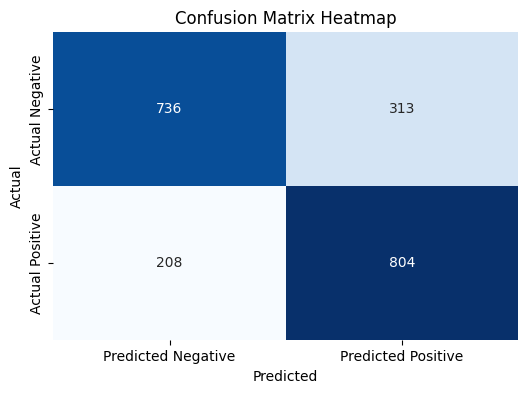

In [42]:
matrix = metrics.confusion_matrix(y_test,yhat)

cm_df = pd.DataFrame(matrix,index=['Actual Negative', 'Actual Positive'], columns = ['Predicted Negative', 'Predicted Positive'])

plt.figure(figsize=(6,4))
sns.heatmap(cm_df,annot=True,fmt = 'd', cmap="Blues",cbar=False)
plt.title("Confusion Matrix Heatmap")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

b. ROC curve <br>
Comment: The model achieved an ROC AUC score of 82.6%, indicating a good level of discrimination between the positive and negative classes. This suggests the model is effective at distinguishing between the two outcomes, through there may still bbe room for improvement to further enhance its predictive accuracy

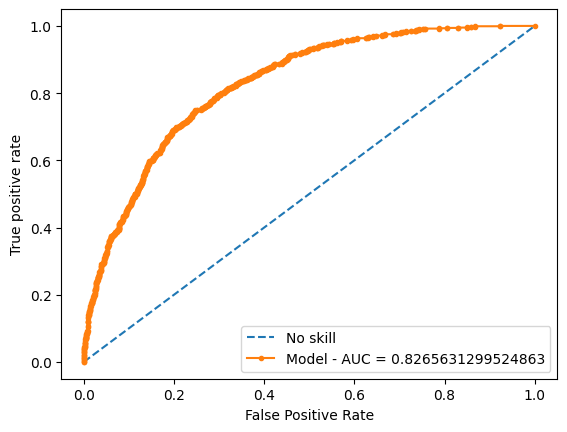

In [43]:
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob)
model_auc = metrics.roc_auc_score(y_test,y_prob)
plt.plot([0,1], [0,1], linestyle = '--', label = 'No skill')
plt.plot(fpr, tpr, marker = '.', label = f'Model - AUC = {model_auc}')

plt.xlabel('False Positive Rate')
plt.ylabel('True positive rate')
plt.legend()
plt.show(block=False)

c. Precision recall curve

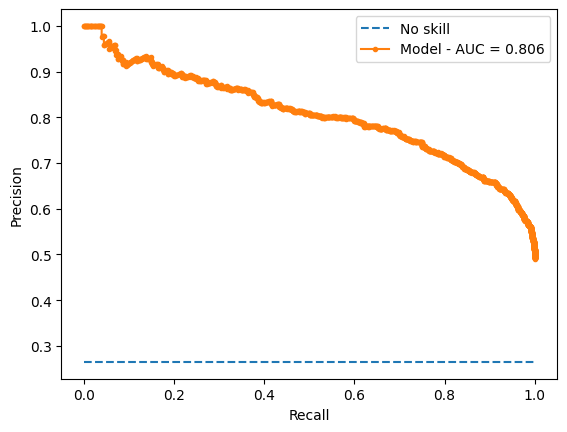

In [44]:
#calculate roc curves
y_prob = model.predict_proba(X_test)[:,1]
precision,recall,threshold = metrics.precision_recall_curve(y_test,y_prob)

#calculate scores
model_auc = metrics.auc(recall,precision)

#plot the roc curve for the model
ns = len(y[y==1])/len(y)
plt.plot([0,1],[ns,ns],linestyle = '--', label = 'No skill')
plt.plot(recall, precision, marker = '.', label = 'Model - AUC = %.3f' %(model_auc))

#show axis labels and the legend
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show(block=False)

#### 6.1.9 K-fold Cross Validation

Comment: The standard deviation is 0.013 (or 1.27%), which is relatively low. This suggests that the model's performance is quite stable across different runs or subsets of data, with minimal variation

In [45]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, y_train, scoring='f1', cv =10)
print(scores)

[0.78281069 0.77555817 0.76744186 0.74495848 0.76689977 0.74971429
 0.7627907  0.74541284 0.77802691 0.76470588]


In [46]:
print('Score_Std: ', np.std(scores))
print('Score_mean: ', np.mean(scores))

Score_Std:  0.012721100428675192
Score_mean:  0.7638319576698333


## 7. Save Model

In [47]:
data = df.copy()
X = data[dependent]
y = data['Churn']

In [48]:
from sklearn.model_selection import train_test_split
X_train_, X_test_, y_train_, y_test_ = train_test_split(X,y, random_state=42, test_size=0.2)

## 8. Pipeline Creation

In [49]:
import numpy as np 
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import FunctionTransformer
import pickle

#1. Function to clean data 
def clean_data(df):
    df_new = df.copy()

    #replace empty strings with Nan
    df_new = df_new.replace (' ',np.nan)

    #clean up spectific columns
    columns_to_clean = ['OnlineBackup', 'StreamingMovies', 'StreamingTV', 
                        'TechSupport', 'DeviceProtection',
                        'OnlineSecurity', 'MultipleLines']
    for col in columns_to_clean:
        if col in df_new.columns:
            df_new[col] = np.where ((df_new[col] == 'No phone service') |
                                    (df_new[col] == 'No internet service'), 'No', df_new[col])
    return df_new

data_cleaning = FunctionTransformer(clean_data)

#2. Define preprocessing pipelines for numerical and categorical features
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

#3. Definbe column lists
num_cols = ['TotalCharges']
cat_cols = ['Partner', 'Dependents', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']

#4. Combine numerical and categorical pipeline using ColumnTransform
feat_transformer = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, num_cols),
    ('cat_pipeline', cat_pipeline, cat_cols)
], remainder='drop', n_jobs=-1)

#5. Create the full model pipeline, including data cleaning, preprocessing, and model fitting
model_pipeline = Pipeline(steps=[
    ('data_cleaning', data_cleaning), #Data cleaning step
    ('preprocessor', feat_transformer), #Preprocessing step
    ('classifier', LogisticRegression()) #Model fitting step
])

#Example usage
model_pipeline.fit(X_train_, y_train_)

Pipeline(steps=[('data_cleaning',
                 FunctionTransformer(func=<function clean_data at 0x1475c6f20>)),
                ('preprocessor',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['TotalCharges']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Partner', 'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'SeniorCitizen'])])),
                ('classifier', LogisticRegression())])

In [50]:
# Save pipeline to file with name 'Logistic_Regression_model.pkl'
with open('Logistic_Regression_model.pkl', 'wb') as file:
    pickle.dump(model_pipeline,file)

## 9. Test Model

### Load Logistic Regression model saved

In [51]:
# Import pipeline 
with open('Logistic_Regression_model.pkl', 'rb') as file:
    loaded_model_pipeline = pickle.load(file)

# Usde model to predict 'X_test'
y_pred = loaded_model_pipeline.predict(X_test_)

#Print result
print(y_pred)

['No' 'No' 'Yes' ... 'Yes' 'No' 'No']


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

#assume y_test is real object to test
accuracy = accuracy_score(y_test_,y_pred)
print('Accuracy: ', accuracy)

conf_matrix = confusion_matrix(y_test_,y_pred)
print('Confusion Matrix: \n', conf_matrix)

Accuracy:  0.8074179743223966
Confusion Matrix: 
 [[959 123]
 [147 173]]


## 10. Model Selection

First, we'll import all classification models and then train multiple models to determine which performs the best

In [56]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import time

In [57]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          BernoulliNB(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          SVC()]
train_times = []
names = []
scores = []
for model in models:
    start = time.time()
    scores.append(cross_val_score(estimator=model, X = X_train, y=y_train, scoring='accuracy', cv=5).mean())
    end = time.time()
    train_times.append(end-start)
    names.append(model.__class__.__name__)

In [58]:
model_data = pd.DataFrame(
    {
        'model_name': names,
        'scores': scores,
        'training_time': train_times
    }
)
model_data.sort_values(by='scores',ascending=False)

,model_name,scores,training_time
4,RandomForestClassifier,0.863763,2.798266
3,DecisionTreeClassifier,0.853088,0.240153
0,LogisticRegression,0.752517,0.241669
2,BernoulliNB,0.720003,0.163943
1,KNeighborsClassifier,0.717215,0.386456
5,SVC,0.611915,11.478951


I use model_feature_importances_to define the 10 importance features

In [59]:
model_final = RandomForestClassifier(n_estimators=50, max_depth=30, max_features='log2', min_samples_leaf=1, min_samples_split=2)

In [61]:
model = RandomForestClassifier(n_estimators=50, max_depth=30, max_features='log2', min_samples_leaf=1, min_samples_split=2)
model.fit(X_train, y_train)
imp_features = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [62]:
imp_features_df = imp_features.reset_index()
imp_features_df.columns = ['Feature', 'Importance']
imp_features_df.head(10)

,Feature,Importance
0,TotalCharges,0.597719
1,Contract_Month-to-month,0.094406
2,Contract_Two year,0.047195
3,InternetService_Fiber optic,0.030236
4,PaymentMethod_Electronic check,0.027322
5,Contract_One year,0.017775
6,InternetService_DSL,0.015609
7,PaperlessBilling_Yes,0.013253
8,PaymentMethod_Credit card (automatic),0.011871
9,PaperlessBilling_No,0.011417


In [63]:
top_features_list = imp_features_df.iloc[:,0].head(10).tolist()

Train model using top 10 features

In [64]:
X_train_imp = X_train[top_features_list]
X_test_imp = X_test[top_features_list]

model_final.fit(X_train_imp, y_train)
ypred_ = model_final.predict(X_test_imp)

accuracy_score = metrics.accuracy_score(y_test,ypred_)
precision_score = metrics.precision_score(y_test,ypred_)
recall = metrics.recall_score(y_test, ypred_)
f1 = metrics.f1_score(y_test,ypred_)
report = metrics.classification_report(y_test, ypred_)

print('Acuracy score: ', accuracy_score)
print('Precision score: ', precision_score)
print('Recall score: ', recall)
print('F1 score: ', f1)

Acuracy score:  0.8685104318292092
Precision score:  0.8218940052128584
Recall score:  0.9347826086956522
F1 score:  0.874711049468331


Comment: Before and after pergorming fine-tuning and selecting the top 10 most important features: <br>
- Before: The model achieved an overall F1 score of 75.87%
- After: The f1 score of model increase to 87.47% which is better than before

In additon, we can see that Recall Score is 93.47% higher than Precision Score(82.19%). In churn prediciton case, recall is more important than precision because <br>
1. If a churn customer is predicted not to churn, the business team may take incorrect actions
2. If a customer who is not actually going to churn is predicted to churn, tere is no issue if the business team gives them attention.

Summary: After evaluating multiple models, I decided to select the RandomForstClassifier as the final model due to its high accuracy(87%-f1 score) and strong recall performance (94%), making it a reliable choice